In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [ ]:
data = pd.read_csv("creditcard.csv")
print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(data.describe())


               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ...   
min     

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0031458411979363283
Fraud Cases: 25
Valid Transactions: 7947


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,7947.000000
mean,65.284891
std,194.126547
min,0.000000
25%,4.795000
50%,15.950000
75%,54.990000
max,7712.430000


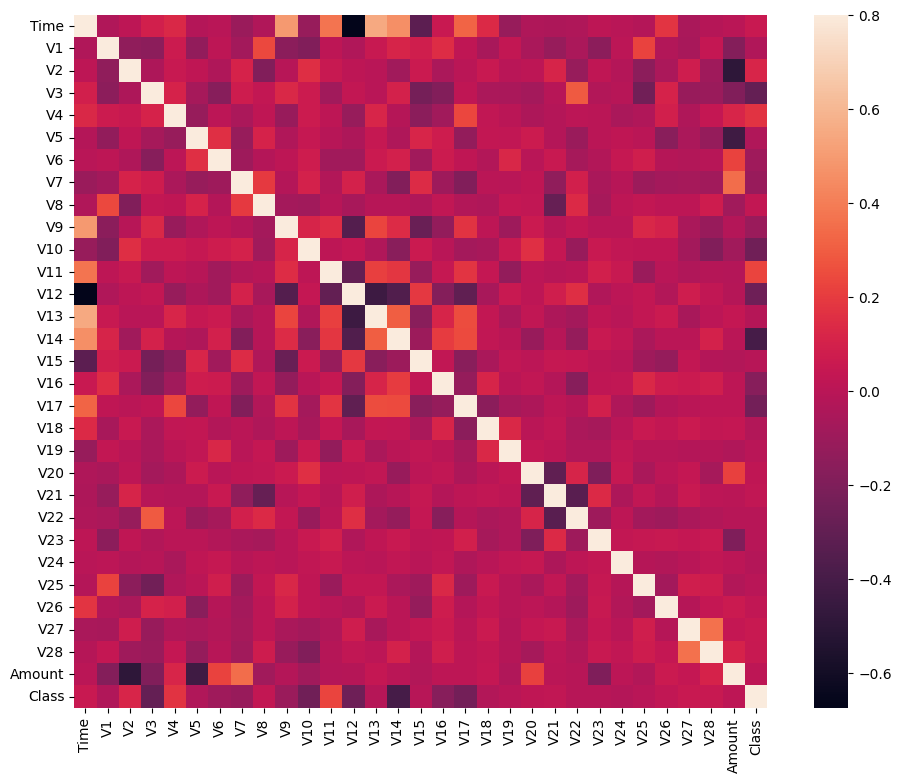

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


(7973, 30)
(7973,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [ ]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())


NaN values in yTest before imputation: 1
NaN values in yTest after imputation: 0


Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient: 1.0000


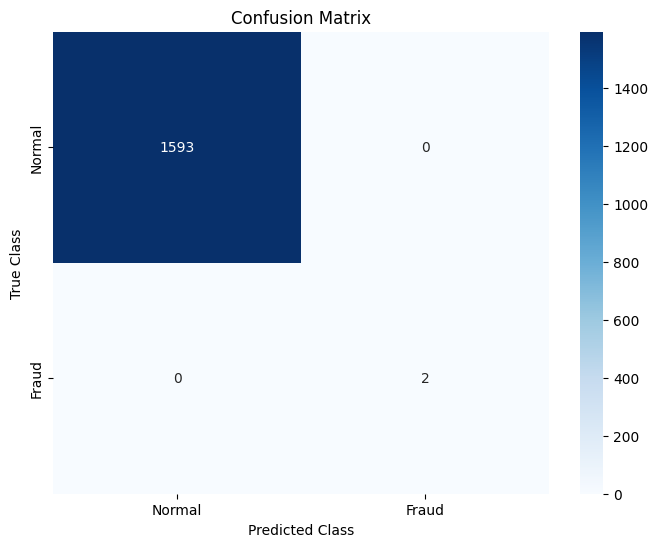

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # Evaluation metrics
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
# prompt: apply 3 algorthims in this

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

# ... (Your existing code) ...

# Logistic Regression
lr = LogisticRegression()

# Impute missing values in xTrain and xTest
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

lr.fit(xTrain, yTrain)
y_pred_lr = lr.predict(xTest)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(yTest, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)
y_pred_dt = dt.predict(xTest)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(yTest, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Support Vector Machine
svm = SVC()
svm.fit(xTrain, yTrain)
y_pred_svm = svm.predict(xTest)

# Evaluate SVM
accuracy_svm = accuracy_score(yTest, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Logistic Regression Accuracy: 0.9987
Decision Tree Accuracy: 0.9994
SVM Accuracy: 0.9987


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# ... (Your existing imports and code) ...

# Assuming 'data' DataFrame is already loaded

# Improved data preprocessing
# 1. Handle missing values (if any) more robustly
# 2. Consider scaling or normalization of features
# 3. Feature engineering (if applicable)

# Impute missing values in yData before splitting
imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent for classification target
yData = imputer.fit_transform(yData.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42, stratify = yData) # Stratify for class balance

# ... (Rest of your existing code) ...


In [ ]:
# prompt: apply algorithms on this

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # Evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# ... (Your existing code) ...

# Improved data preprocessing
# 1. Handle missing values (if any) more robustly - Already handled in the original code
# 2. Consider scaling or normalization of features
# 3. Feature engineering (if applicable)

# Impute missing values in yData before splitting (Already done)
# ...

# Split the data into training and testing sets (Already done with stratification)
# ...

# Feature Scaling using StandardScaler
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Impute NaNs in xTrain and xTest after scaling
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)


# ... (Rest of your existing code for model training and evaluation) ...

# Logistic Regression
lr = LogisticRegression()
lr.fit(xTrain, yTrain)
y_pred_lr = lr.predict(xTest)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(yTest, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)
y_pred_dt = dt.predict(xTest)
# Evaluate Decision Tree
accuracy_dt = accuracy_score(yTest, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Support Vector Machine
svm = SVC()
svm.fit(xTrain, yTrain)
y_pred_svm = svm.predict(xTest)

# Evaluate SVM
accuracy_svm = accuracy_score(yTest, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Logistic Regression Accuracy: 0.9994
Decision Tree Accuracy: 0.9994
SVM Accuracy: 0.9994


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8977 - loss: 0.3773 - val_accuracy: 0.9984 - val_loss: 0.0202
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0209 - val_accuracy: 0.9984 - val_loss: 0.0062
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9984 - val_loss: 0.0030
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 7.7552e-04
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.5401e-04
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 9.9980e-04 - val_accuracy: 1.0000 - val_loss: 3.4563e-04
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9463e-04 - val_acc

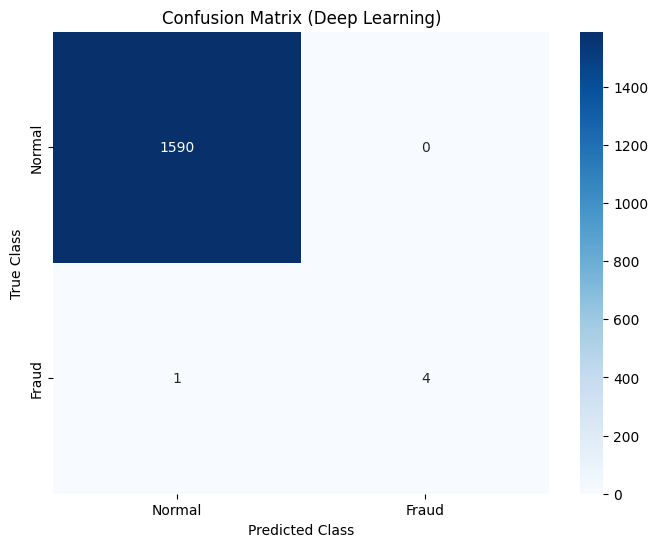

In [ ]:
# prompt: apply deep learning

# ... (Your existing imports and code) ...

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(30, activation='relu', input_shape=(xTrain.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(xTrain, yTrain, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(xTest, yTest)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_dl = (model.predict(xTest) > 0.5).astype(int) # Convert probabilities to binary predictions

# ... (Rest of your evaluation metrics code) ...
accuracy_dl = accuracy_score(yTest, y_pred_dl)
precision_dl = precision_score(yTest, y_pred_dl)
recall_dl = recall_score(yTest, y_pred_dl)
f1_dl = f1_score(yTest, y_pred_dl)
mcc_dl = matthews_corrcoef(yTest, y_pred_dl)

print("Deep Learning Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall: {recall_dl:.4f}")
print(f"F1-Score: {f1_dl:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_dl:.4f}")

# Confusion matrix for Deep Learning model
conf_matrix_dl = confusion_matrix(yTest, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dl, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix (Deep Learning)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
